### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Петров Артем Евгеньевич
##### Группа:   НКНбд-01-21

## Москва 2024
***

# Вариант №1

Текст задания...

Решение...

В соответствии с индивидуальным заданием, указанным в записной книжке команды Teams, выполните следующее:  

Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и выведите названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией. 
Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок. 
Постройте диаграмму рассеяния для независимого и зависимого признаков, подписывая оси и рисунок, определите наличие одиноко расположенные точек и, при наличии, удалите их. 
Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Определите лучший из двух подходов по показателю качества R^2 (коэффициенту детерминации). 
Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду для линий регрессии.  
Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака). Нормализуйте зависимый признак. 
Используя созданный нормализующий слой и нормализованный зависимый признак, постройте регресоры на базе следующих моделей множественной регрессии: 
  линейной регрессии 
  гребневой регрессии (L2) 
  лассо регрессии (L1) 

Выберите коэффициенты регуляризации l1 и l2 так, чтобы нейронные сети для всех трех моделей обучались (значение ошибки уменьшалось в процессе обучения). 
Определите на контрольной выборке (с нормализованным зависимым признаком) модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей. 
Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения). 
Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка. 
Результат контрольной работы оформить в виде отчета в формате файла Jupiter Notebook (шаблон отчета находится в учебных материалах команды в формате .ipynb). Включите в отчет номер варианта, текст индивидуального задания, пункты 1-10 задания, указанные выше, и программный код для решения этих пунктов. Сопроводите программный код необходимыми комментариями. Дополнительно (кроме файла расширением .ipynb) представить распечатку файла с отчетом в формате PDF. Не архивировать файлы.  

Контрольная работа 1 – Вариант 13 

1. Набор данных: cherry_blossoms 

2. Независимая переменная: temp_lower 

3. Зависимая переменная: temp_upper 

4. Визуализация для независимой переменной – эмпирическая плотность распределения 

5. Визуализация для зависимой переменной – столбчатая диаграмма 

6. Показатель качества регрессии – R^2 (коэффициент детерминации) 

In [1]:
import sys

sys.setrecursionlimit(1000)

# 1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и выведите названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией. 

In [114]:
# import tensorflow_datasets as tfds
# import tensorflow as tf
import pandas as pd

In [115]:
# builder = tfds.builder('cherry_blossoms')
# builder.download_and_prepare()
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/cherry_blossoms.csv', sep = ';')

In [116]:
display(df)

,year,doy,temp,temp_upper,temp_lower
0,801,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1210,2011,99.0,NaN,NaN,NaN
1211,2012,101.0,NaN,NaN,NaN
1212,2013,93.0,NaN,NaN,NaN
1213,2014,94.0,NaN,NaN,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1215 non-null   int64  
 1   doy         827 non-null    float64
 2   temp        1124 non-null   float64
 3   temp_upper  1124 non-null   float64
 4   temp_lower  1124 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 47.6 KB


In [118]:
def columns_with_missing_data(df):
    for column in df.columns[df.isnull().any()]:
        print(f"{column:<20}\t{df[column].isnull().mean():.2f}")

print(columns_with_missing_data(df))

doy                 	0.32
temp                	0.07
temp_upper          	0.07
temp_lower          	0.07
None


In [119]:
df.isna().sum()

year            0
doy           388
temp           91
temp_upper     91
temp_lower     91
dtype: int64

In [124]:
df = df.dropna()

In [125]:
display(df_fixed)

,year,doy,temp,temp_upper,temp_lower
50,851,108.0,7.38,12.10,2.66
63,864,100.0,6.42,8.69,4.14
65,866,106.0,6.44,8.11,4.77
88,889,104.0,6.83,8.48,5.19
90,891,109.0,6.98,8.96,5.00
...,...,...,...,...,...
1175,1976,99.0,8.20,8.77,7.63
1176,1977,93.0,8.22,8.78,7.66
1177,1978,104.0,8.20,8.78,7.61
1178,1979,97.0,8.28,8.83,7.73


In [126]:
import numpy as np

In [132]:
# df_max_corr = df.corr() 
# display(df_max_corr)

print("Data Frame")
print(df)
print()

print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5, ascending=False):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=ascending)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3, ascending=False))
print("Top lowest correlations")
print(get_top_abs_correlations(df, 3, ascending=True))

Data Frame
      year    doy  temp  temp_upper  temp_lower
50     851  108.0  7.38       12.10        2.66
63     864  100.0  6.42        8.69        4.14
65     866  106.0  6.44        8.11        4.77
88     889  104.0  6.83        8.48        5.19
90     891  109.0  6.98        8.96        5.00
...    ...    ...   ...         ...         ...
1175  1976   99.0  8.20        8.77        7.63
1176  1977   93.0  8.22        8.78        7.66
1177  1978  104.0  8.20        8.78        7.61
1178  1979   97.0  8.28        8.83        7.73
1179  1980  102.0  8.30        8.86        7.74

[787 rows x 5 columns]

Correlation Matrix
                year       doy      temp  temp_upper  temp_lower
year        1.000000  0.013970  0.028033   -0.315807    0.386703
doy         0.013970  1.000000 -0.326976   -0.294773   -0.271967
temp        0.028033 -0.326976  1.000000    0.876747    0.858841
temp_upper -0.315807 -0.294773  0.876747    1.000000    0.506662
temp_lower  0.386703 -0.271967  0.858841    

# 2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.

## Визуализация для независимой переменной – эмпирическая плотность распределения( Независимая переменная: temp_lower ) 
## Визуализация для зависимой переменной – столбчатая диаграмма (Зависимая переменная: temp_upper)

In [138]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Density plot for temp_lower'}, ylabel='Density'>

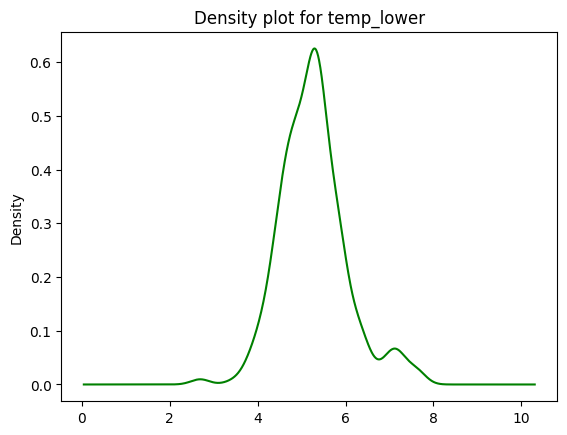

In [139]:
df['temp_lower'].plot.density(color = 'green', title = 'Density plot for temp_lower')

temp_upper
6.74    10
6.41     9
6.45     9
7.09     9
6.64     9
        ..
7.70     1
7.47     1
7.23     1
5.84     1
8.86     1
Name: count, Length: 275, dtype: int64


<Axes: title={'center': 'Box plot for temp_upper'}, ylabel='Frequency'>

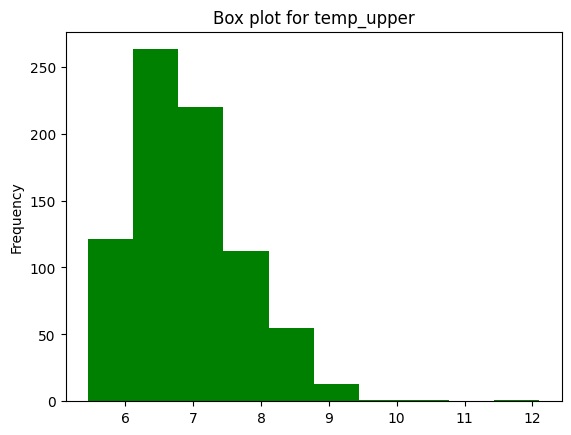

In [143]:
print(df['temp_upper'].value_counts())
df['temp_upper'].plot.hist(bins = 10, color = 'green', title = "Box plot for temp_upper")

# 3. Постройте диаграмму рассеяния для независимого и зависимого признаков, подписывая оси и рисунок, определите наличие одиноко расположенные точек и, при наличии, удалите их.

Text(0.5, 1.0, 'temp_lower dependcy to temp_upper')

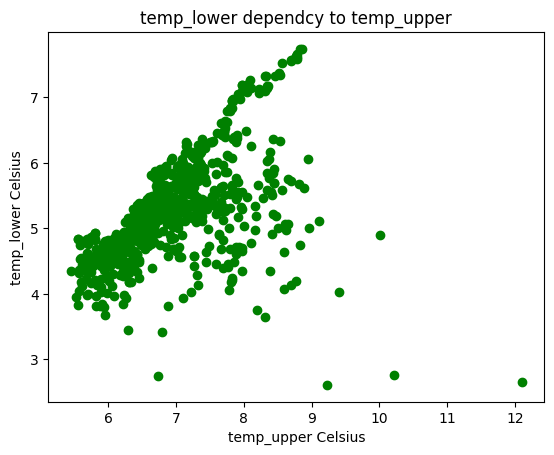

In [164]:
plt.scatter(df['temp_upper'], df['temp_lower'], color = 'g')
plt.xlabel("temp_upper Celsius")
plt.ylabel("temp_lower Celsius")
plt.title("temp_lower dependcy to temp_upper")

Text(0.5, 1.0, 'temp_lower dependcy to temp_upper')

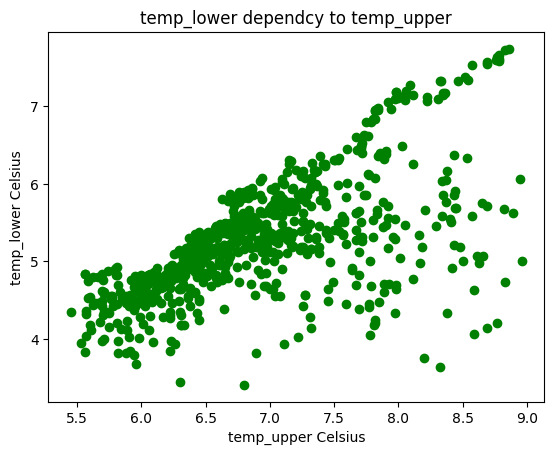

In [165]:
df_new = df[(df['temp_upper'] < 9) & (df['temp_lower'] < 10) & (df['temp_lower'] > 3)]

plt.scatter(df_new['temp_upper'], df_new['temp_lower'], color = 'g')
plt.xlabel("temp_upper Celsius")
plt.ylabel("temp_lower Celsius")
plt.title("temp_lower dependcy to temp_upper")


In [166]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x_train) == len(y_train), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / \
                  (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"


In [167]:
reg = SimpleLinReg()
reg

SimpleLinearReg()

In [180]:
split_df = np.array_split(df_new, 2)

C:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [181]:
train = split_df[0]
test = split_df[1]
print(train, type(train), test, type(test))

     year    doy  temp  temp_upper  temp_lower
63    864  100.0  6.42        8.69        4.14
65    866  106.0  6.44        8.11        4.77
88    889  104.0  6.83        8.48        5.19
90    891  109.0  6.98        8.96        5.00
93    894  106.0  6.98        8.40        5.55
..    ...    ...   ...         ...         ...
761  1562   99.0  6.29        6.92        5.65
762  1563   99.0  6.13        6.78        5.49
763  1564  109.0  6.18        6.96        5.39
764  1565  114.0  6.16        6.89        5.43
765  1566   97.0  6.28        6.94        5.63

[390 rows x 5 columns] <class 'pandas.core.frame.DataFrame'>       year    doy  temp  temp_upper  temp_lower
766   1567  108.0  6.09        6.76        5.42
767   1568  106.0  6.09        6.76        5.43
769   1570  112.0  6.16        6.80        5.51
770   1571  108.0  6.35        7.04        5.67
771   1572  107.0  6.38        7.06        5.71
...    ...    ...   ...         ...         ...
1175  1976   99.0  8.20        8.77   

In [182]:
reg.fit(train['temp_upper'].values, train['temp_lower'].values)

SimpleLinearReg()

In [183]:
reg.a_, reg.b_

(0.4197131735986538, 2.152058752186659)

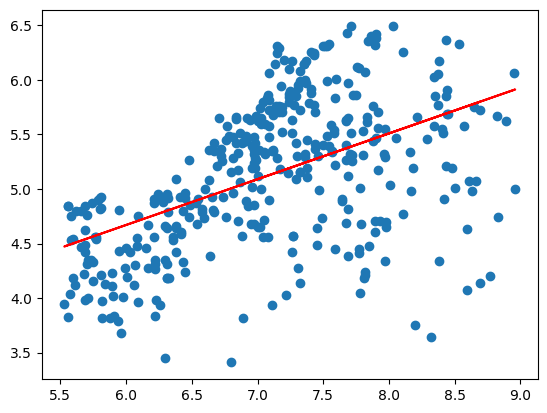

In [184]:
y_hat = reg.predict(train['temp_upper'].values)

plt.scatter(train['temp_upper'], train['temp_lower'])
plt.plot(train['temp_upper'], y_hat, color = 'r')

In [192]:
y_test = train['temp_lower'].values
mse_test = np.sum((y_hat - y_test)**2) / len(y_test)
print("mean square error", mse_test)

metric_reg = 1 - mse_test/np.var(y_test)
print("R^2=", metric_reg)

mean square error 0.34041742579150724
R^2= 0.25615040590148686


# Через ТensorFlow

In [193]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [214]:
model = tf.keras.Sequential([ tf.keras.layers.Dense(1, input_shape=(1,)) ])


C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [215]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [216]:
model.compile(
    loss = tf.keras.losses.mean_absolute_error,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.25),
    metrics=['r2_score']
)

In [217]:
model.fit(train['temp_upper'].values, train['temp_lower'].values, epochs=150)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.4310 - r2_score: -19.9360
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8094 - r2_score: -1.2101 
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6655 - r2_score: -0.6278 
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5528 - r2_score: -0.1052
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5606 - r2_score: -0.0660 
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5138 - r2_score: -0.0104 
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5322 - r2_score: -0.2665 
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5346 - r2_score: 0.0220 
Epoch 9/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5210 - r2_score: -0.0653 
Epoch 10/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4935 - r2_score: 0.0848 
Epoch 11/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4871 - r2_score: 0.1146  
Epoch 12/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1

# В итоге получаем, что для точеного подхода коэффицент $R^2
# равен 0.25615040590148686, а для нейронной сети с одним нейроном -- 
# 0.2022

# 5. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду для линий регрессии. 

In [218]:
y_hat1 = model.predict(train['temp_upper'].values)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


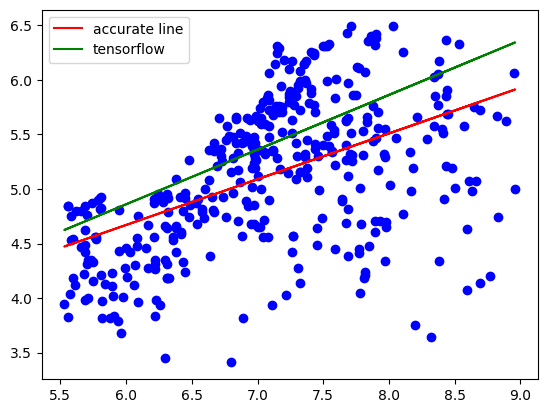

In [219]:
plt.scatter(train['temp_upper'], train['temp_lower'], c='b')
plt.plot(train['temp_upper'], y_hat,  c='r', label = 'accurate line')
plt.plot(train['temp_upper'], y_hat1, c='g', label = 'tensorflow')
plt.legend()

# 6. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака). Нормализуйте зависимый признак. 

Независимая переменная: temp_lower

Зависимая переменная: temp_upper

In [222]:
split_df = np.array_split(df_new, 2)

In [236]:
train = split_df[0]
predict = split_df[1]
display(train)
train.columns

,year,doy,temp,temp_upper,temp_lower
63,864,100.0,6.42,8.69,4.14
65,866,106.0,6.44,8.11,4.77
88,889,104.0,6.83,8.48,5.19
90,891,109.0,6.98,8.96,5.00
93,894,106.0,6.98,8.40,5.55
...,...,...,...,...,...
761,1562,99.0,6.29,6.92,5.65
762,1563,99.0,6.13,6.78,5.49
763,1564,109.0,6.18,6.96,5.39
764,1565,114.0,6.16,6.89,5.43


Index(['year', 'doy', 'temp', 'temp_upper', 'temp_lower'], dtype='object')

In [250]:
normalizer = tf.keras.layers.Normalization()

In [251]:
normalizer.adapt(train[['year', 'doy', 'temp', 'temp_lower']].values)

In [252]:
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

[[1298.3513     104.84359      6.1012053    5.123359 ]]
[[3.5666660e+04 4.1224255e+01 4.2067215e-01 4.5764282e-01]]


In [253]:
train[['year', 'doy', 'temp', 'temp_lower']][0:5]

,year,doy,temp,temp_lower
63,864,100.0,6.42,4.14
65,866,106.0,6.44,4.77
88,889,104.0,6.83,5.19
90,891,109.0,6.98,5.00
93,894,106.0,6.98,5.55


In [254]:
normalizer(train[['year', 'doy', 'temp', 'temp_lower']][0:5]).numpy()

array([[-2.299905  , -0.75438136,  0.4915178 , -1.4536134 ],
       [-2.289315  ,  0.18010904,  0.52235377, -0.52233976],
       [-2.1675293 , -0.13138776,  1.1236557 ,  0.0985093 ],
       [-2.1569393 ,  0.64735425,  1.3549259 , -0.18235102],
       [-2.1410542 ,  0.18010904,  1.3549259 ,  0.6306657 ]],
      dtype=float32)

# Нормализация зависимого признака

In [277]:
normalizer1 = tf.keras.layers.Normalization(axis=None, input_shape=(1,))

C:\Python312\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [278]:
normalizer1.adapt(train['temp_upper'].values)

In [279]:
print(normalizer1.mean.numpy())
# print(normalizer1.variance.numpy())

[7.079359]


In [280]:
train['temp_upper']
# normalizer1(train['temp_upper']).numpy()

63     8.69
65     8.11
88     8.48
90     8.96
93     8.40
       ... 
761    6.92
762    6.78
763    6.96
764    6.89
765    6.94
Name: temp_upper, Length: 390, dtype: float64

# 7. Используя созданный нормализующий слой и нормализованный зависимый признак, постройте регресоры на базе следующих моделей множественной регрессии: 
  1. линейной регрессии 
  2. гребневой регрессии (L2) 
  3. лассо регрессии (L1) 

Выберите коэффициенты регуляризации l1 и l2 так, чтобы нейронные сети для всех трех моделей обучались (значение ошибки уменьшалось в процессе обучения).

In [327]:
linear_model = tf.keras.Sequential([
    normalizer1,
    tf.keras.layers.Dense(units=1)
])

linear_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [328]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error',
    metrics=['r2_score']
)

In [335]:
%%time
history_linear = linear_model.fit(
    train['temp_upper'], train['temp_lower'],
    epochs=100,
    # подавляем вывод
    # verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5303 - r2_score: -0.0819 - val_loss: 0.2934 - val_r2_score: 0.4148
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4968 - r2_score: 0.2049 - val_loss: 0.3036 - val_r2_score: 0.3291
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5073 - r2_score: 0.1348 - val_loss: 0.3047 - val_r2_score: 0.3544
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5509 - r2_score: 0.0229 - val_loss: 0.2956 - val_r2_score: 0.3767
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4999 - r2_score: 0.1675 - val_loss: 0.2942 - val_r2_score: 0.4140
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4988 - r2_score: 0.1550 - val_loss: 0.2898 - val_r2_score: 0.4069
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5132 - r2_score: 0.1504 - val_loss: 0.2828 - val_r2_score: 0.4235
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5173 - r2_score: 0.0574 - val_loss: 0.3175 - val

In [336]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.518174,0.367523,95
96,0.507600,0.315754,96
97,0.506301,0.320101,97
98,0.509951,0.311963,98
99,0.520420,0.323843,99


In [339]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.plot(history.history['r2_score'], label='r2_score')
  # plt.plot(history.history['val_r2_score'], label='r2_score')
  plt.ylim([0, max(history.history['loss'])*0.5])
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(True)

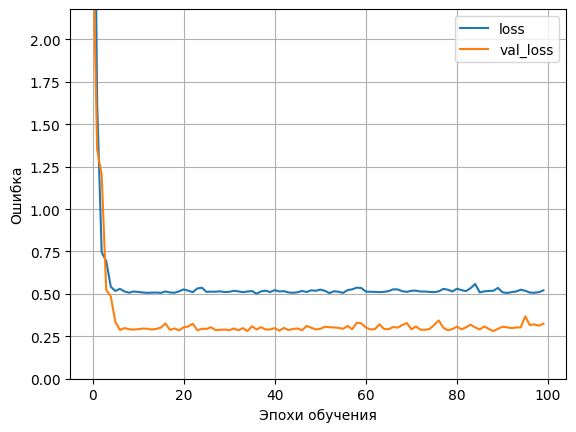

In [340]:
plot_loss(history)

In [341]:
test_results = {} # пустой словарь

test_results['feature_model'] = linear_model.evaluate(
    train['temp_upper'],
    train['temp_lower'], verbose=0)

In [342]:
x = tf.linspace(4., 9., 51)
y = linear_model.predict(x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [346]:
def plot_rm(x, y):
  plt.scatter(train['temp_upper'], train['temp_lower'], label='Data')
  plt.plot(x, y, color='k', label='Predict')
  plt.xlabel('temp_upper')
  plt.ylabel('temp_lower')
  plt.legend()

In [369]:
def plot_all_regressions(x_lin, y_lin, x_l1, y_l1, x_l2, y_l2): 
  plt.scatter(train['temp_upper'], train['temp_lower'], label='Data')
  plt.plot(x_lin, y_lin, color='k', label='Linear')
  plt.plot(x_l1, y_l1, color='r', label='L1')
  plt.plot(x_l2, y_l2, color='g', label='L2')
  plt.xlabel('temp_upper')
  plt.ylabel('temp_lower')
  plt.title('All plotted regressions(linear, L1, L2)')
  plt.legend()

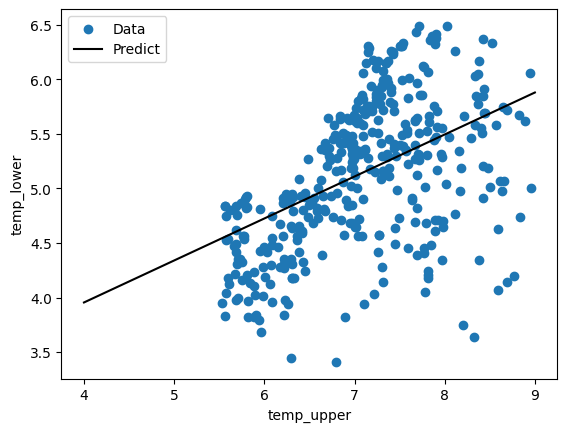

In [347]:
plot_rm(x, y)

# L1 

In [348]:
df_normalizer = tf.keras.layers.Normalization(axis=None, input_shape = (1,))
df_normalizer.adapt(train['temp_upper'].values)
print(df_normalizer.mean.numpy())
# print(df_normalizer.variance.numpy())

[7.079359]


C:\Python312\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [349]:
l1_model = tf.keras.Sequential([
    df_normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))
])

In [350]:
l1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error',
    metrics=['r2_score']
)

In [351]:
%%time
history = l1_model.fit(
    train['temp_upper'], train['temp_lower'],
    epochs=100,
    # подавляем вывод
    verbose=1,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 4.2199 - r2_score: -44.8796 - val_loss: 5.1591 - val_r2_score: -139.8089
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2635 - r2_score: -13.0760 - val_loss: 1.3604 - val_r2_score: -9.3439
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6920 - r2_score: -0.3722 - val_loss: 1.4879 - val_r2_score: -12.0604
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7967 - r2_score: -1.1678 - val_loss: 0.4119 - val_r2_score: -0.2089
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5107 - r2_score: 0.0170 - val_loss: 0.4556 - val_r2_score: -0.4092
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5341 - r2_score: 0.1298 - val_loss: 0.3242 - val_r2_score: 0.2106
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5304 - r2_score: 0.1497 - val_loss: 0.2875 - val_r2_score: 0.4248
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4948 - r2_score: 0.2016 - val_loss:

In [352]:
l1_model.layers[1].kernel

<KerasVariable shape=(1, 1), dtype=float32, path=sequential_11/dense_11/kernel>

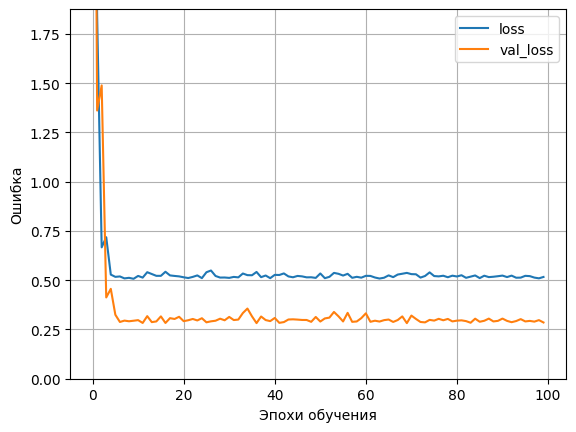

In [353]:
plot_loss(history)

In [354]:
test_results = {} # пустой словарь

test_results['feature_model'] = linear_model.evaluate(
    train['temp_upper'],
    train['temp_lower'], verbose=0)

In [355]:
x = tf.linspace(4., 9., 51)
y = l1_model.predict(x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


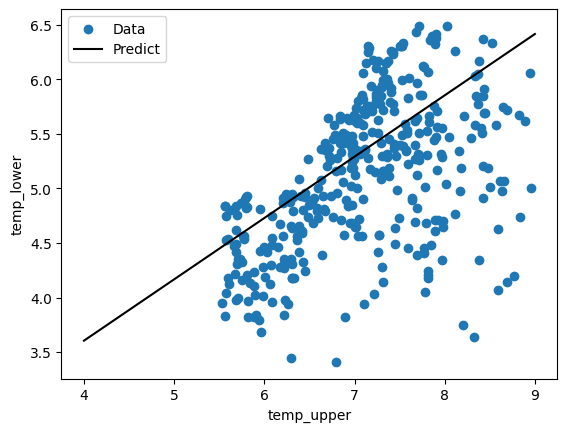

In [357]:
plot_rm(x, y)

# L2

In [358]:
l2_model = tf.keras.Sequential([
    df_normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))
])

In [362]:
l2_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error',
    metrics=['r2_score']
)

In [363]:
%%time
history = l2_model.fit(
    train['temp_upper'], train['temp_lower'],
    epochs=100,
    # подавляем вывод
    verbose=1,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.4940 - r2_score: -39.7843 - val_loss: 4.5864 - val_r2_score: -107.6450
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1786 - r2_score: -12.7533 - val_loss: 1.6297 - val_r2_score: -14.0223
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7650 - r2_score: -0.9503 - val_loss: 1.4146 - val_r2_score: -11.1917
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7557 - r2_score: -1.1300 - val_loss: 0.6157 - val_r2_score: -1.4903
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5545 - r2_score: -0.0192 - val_loss: 0.4784 - val_r2_score: -0.5512
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5471 - r2_score: -0.0356 - val_loss: 0.3227 - val_r2_score: 0.2082
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5085 - r2_score: 0.0746 - val_loss: 0.2942 - val_r2_score: 0.4085
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5116 - r2_score: 0.2032 - val_lo

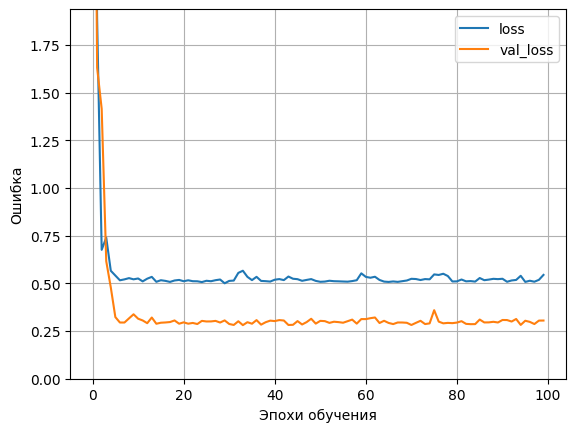

In [364]:
plot_loss(history)

In [365]:
x = tf.linspace(4., 9., 51)
y = l2_model.predict(x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


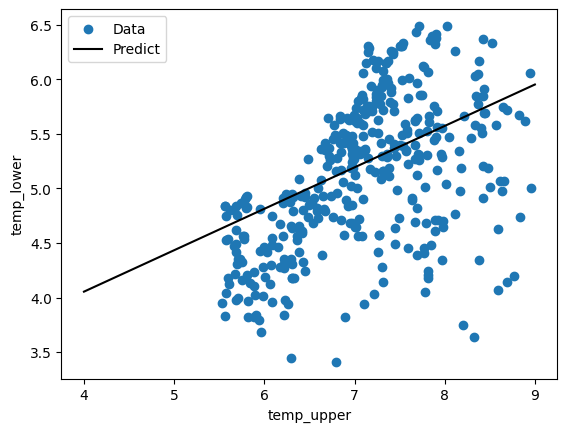

In [366]:
plot_rm(x, y)

# 8. Определите на контрольной выборке (с нормализованным зависимым признаком) модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей(R^2).  

# Linear = 0.2185
# L1 = 0.1416
# L2 = 0.0763

# Данные можно найти выше по каждой из регрессоров в пунтке н.7 в конце обучения

# 9. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения). 

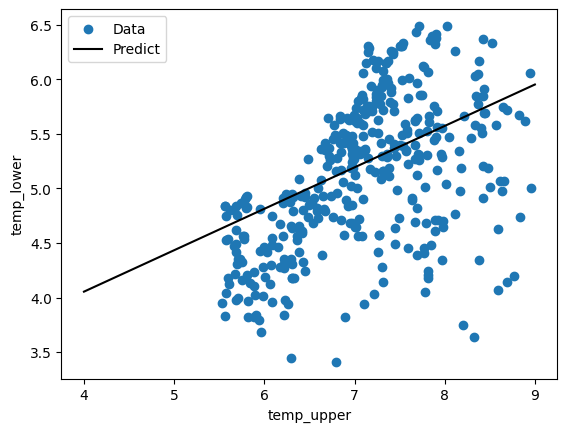

In [368]:
plot_rm(x, y)

# 10. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка. 

In [371]:
x = tf.linspace(4., 9., 51)
y_lin = linear_model.predict(x)
y_l1 = l1_model.predict(x)
y_l2 = l2_model.predict(x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


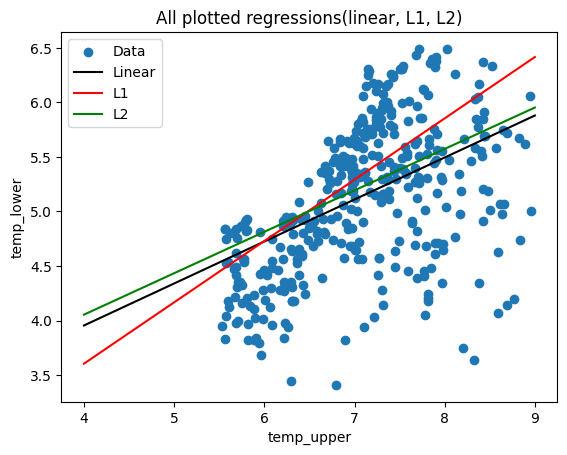

In [372]:
plot_all_regressions(x, y_lin, x, y_l1, x, y_l2)